In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os #path
import io#input output
import re   #regular expression 
import string #string fuctions
import warnings #remove warnings
import numpy as np #to play with array data
import pandas as pd #to load the dataset and exploring
from time import time#to print time
import seaborn as sns #ploting library
import matplotlib.pyplot as plt
from sklearn import utils#encoding
from sklearn.metrics import roc_curve#plot accuracy curve
from sklearn.preprocessing import scale#normalize the data
from sklearn.model_selection import train_test_split#randomly split the data
from sklearn.feature_extraction.text import TfidfVectorizer#vectorise the data

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [0]:
import nltk 
nltk.download('stopwords')#in colab we have to download stopword
nltk.download('punkt')
nltk.download('wordnet')
  
from nltk.stem.porter import * #stemmer for word normalization
stemmer = PorterStemmer() 
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
import gensim
from gensim.models.doc2vec import LabeledSentence,Doc2Vec,TaggedDocument#gensim fuction accept input from labeledsentence
from gensim.models.word2vec import Word2Vec#build word2vec

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D,Dropout,Dense,Embedding
from keras.layers import Bidirectional,LSTM,GRU,Conv2D
from keras.layers import Activation,MaxPool1D,Flatten
from keras.utils import to_categorical

from keras import *
import keras

Using TensorFlow backend.


In [0]:
!pip install utils

In [0]:
train_data=spam = pd.read_csv("/content/drive/My Drive/finalproject/Train.csv")
train_data.head()#checking file loaded properly  or not

,text,label
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",0
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",0
2,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,0
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",0
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",1


In [0]:
print(train_data.shape)
print(train_data['label'].value_counts())
print(train_data.columns)

(40000, 2)
0    20019
1    19981
Name: label, dtype: int64
Index(['text', 'label'], dtype='object')


In [0]:
print(train_data['text'][0])#printing first review
print("first review label:",train_data['label'][0])

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
first review label: 0


In [0]:
print(train_data['text'][24999])
print("Last review label:",train_data['label'][24999])

I only gave this ridiculously titled comedy horror flick a 2 because several famous porn stars of the past appear in it. A group of tourists, supposedly on vacation in Ireland but actually in Canada, run afoul of a cannibalistic inbred mutant something or other, and the plot is more or less right out of THE HILL HAVE EYES ands WRONG TURN. Only problem is, unless I miscounted, there's only one mutant on display, and he isn't all that impressive. Sort of like the potbellied mummy in that homemade film from about five years ago. Some gory but silly deaths help, but the film is strictly amateur night and boring beyond belief. The ending is predictable and has been done to death. No pun intended.
Last review label: 0


In [0]:
test_data=spam = pd.read_csv("/content/drive/My Drive/finalproject/Test.csv")#reading the test data
test_data.head()

,text,label
0,"I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I r...",0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be ...,0
2,"This movie was so poorly written and directed I fell asleep 30 minutes through the movie. The jokes in the movie are corny and even though the plot is interesting at some angles, it is too far fet...",0
3,"The most interesting thing about Miryang (Secret Sunshine) is the actors. Jeon Do-yeon, as Lee Shin-ae, the main character, is a woman with a young son whose husband has died in a tragic accident,...",1
4,"when i first read about ""berlin am meer"" i didn't expect much. but i thought with the right people, the right locations, the right music and fashion you could at least make a trivial movie about t...",0


In [0]:
print(test_data.shape)
print(test_data.columns)

(5000, 2)
Index(['text', 'label'], dtype='object')


In [0]:
total_data = train_data.append(test_data, ignore_index=True, sort=True)
print(total_data.shape)

(45000, 2)


In [0]:
total_data.head()

,label,text
0,0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott..."
1,0,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A..."
2,0,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...
3,0,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script..."
4,1,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re..."


In [0]:
def pre_process(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))
    for i in r:
        input_txt = re.sub(i, '',str(input_txt))
    return input_txt

In [0]:
total_data['processed_review'] = np.vectorize(pre_process)(total_data['text'], "@[\w]*") 
total_data.head()

,label,text,processed_review
0,0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...","I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott..."
1,0,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...","When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A..."
2,0,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...
3,0,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...","Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script..."
4,1,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...","Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re..."


In [0]:
total_data.processed_review = total_data.processed_review.str.replace("[^a-zA-Z#]", " ")
total_data.head()

,label,text,processed_review
0,0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",I grew up b watching and loving the Thunderbirds All my mates at school watched We played Thunderbirds before school during lunch and after school We all wanted to be Virgil or Scott...
1,0,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",When I put this movie in my DVD player and sat down with a coke and some chips I had some expectations I was hoping that this movie would contain some of the strong points of the first movie A...
2,0,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others Replace Woodstock with the Civil War and the Apollo moon landing with...
3,0,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",Even though I have great interest in Biblical movies I was bored to death every minute of the movie Everything is bad The movie is too long the acting is most of the time a Joke and the script...
4,1,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",Im a die hard Dads Army fan and nothing will ever change that I got all the tapes DVD s and audiobooks and every time i watch listen to them its brand new br br The film The film is a re...


In [0]:
total_data.processed_review = total_data.processed_review.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
total_data.head()

,label,text,processed_review
0,0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",grew watching loving Thunderbirds mates school watched played Thunderbirds before school during lunch after school wanted Virgil Scott wanted Alan Counting down from became form took children movi...
1,0,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",When this movie player down with coke some chips some expectations hoping that this movie would contain some strong points first movie Awsome animation good flowing story excellent voice cast funn...
2,0,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,people know what particular time past like feel need define that time others Replace Woodstock with Civil Apollo moon landing with Titanic sinking realistic flick this formulaic soap opera populat...
3,0,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",Even though have great interest Biblical movies bored death every minute movie Everything movie long acting most time Joke script horrible point mixing story about Abraham Noah together value your...
4,1,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",hard Dads Army nothing will ever change that tapes audiobooks every time watch listen them brand film film certain episodes hour Enemy within gates Battle School numerous others with different edg...


In [0]:
tokenized_data= total_data.processed_review.apply(lambda x: x.split())
tokenized_data.head()

0    [I, grew, up, b, watching, and, loving, the, Thunderbirds, All, my, mates, at, school, watched, We, played, Thunderbirds, before, school, during, lunch, and, after, school, We, all, wanted, to, be...
1    [When, I, put, this, movie, in, my, DVD, player, and, sat, down, with, a, coke, and, some, chips, I, had, some, expectations, I, was, hoping, that, this, movie, would, contain, some, of, the, stro...
2    [Why, do, people, who, do, not, know, what, a, particular, time, in, the, past, was, like, feel, the, need, to, try, to, define, that, time, for, others, Replace, Woodstock, with, the, Civil, War,...
3    [Even, though, I, have, great, interest, in, Biblical, movies, I, was, bored, to, death, every, minute, of, the, movie, Everything, is, bad, The, movie, is, too, long, the, acting, is, most, of, t...
4    [Im, a, die, hard, Dads, Army, fan, and, nothing, will, ever, change, that, I, got, all, the, tapes, DVD, s, and, audiobooks, and, every, time, i, watch, listen, to, them, its

In [0]:
#tokenized_data = tokenized_data.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
#tokenized_data.head()

In [0]:
tokenized_data =total_data.processed_review.apply(lambda x:[lemmatizer.lemmatize(i, pos="v") for i in x.split() ])# lemmatizing
tokenized_data.head()

0    [grow, watch, love, Thunderbirds, mat, school, watch, play, Thunderbirds, before, school, during, lunch, after, school, want, Virgil, Scott, want, Alan, Counting, down, from, become, form, take, c...
1    [When, this, movie, player, down, with, coke, some, chip, some, expectations, hop, that, this, movie, would, contain, some, strong, point, first, movie, Awsome, animation, good, flow, story, excel...
2    [people, know, what, particular, time, past, like, feel, need, define, that, time, others, Replace, Woodstock, with, Civil, Apollo, moon, land, with, Titanic, sink, realistic, flick, this, formula...
3    [Even, though, have, great, interest, Biblical, movies, bore, death, every, minute, movie, Everything, movie, long, act, most, time, Joke, script, horrible, point, mix, story, about, Abraham, Noah...
4    [hard, Dads, Army, nothing, will, ever, change, that, tap, audiobooks, every, time, watch, listen, them, brand, film, film, certain, episodes, hour, Enemy, within, gate, Battl

In [0]:
for i in range(len(tokenized_data)):
    tokenized_data[i] = ' '.join(tokenized_data[i])    
total_data['processed_review'] = tokenized_data
total_data.head()

,label,text,processed_review
0,0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott...",grow watch love Thunderbirds mat school watch play Thunderbirds before school during lunch after school want Virgil Scott want Alan Counting down from become form take children movie hop they woul...
1,0,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: A...",When this movie player down with coke some chip some expectations hop that this movie would contain some strong point first movie Awsome animation good flow story excellent voice cast funny comedy...
2,0,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with...,people know what particular time past like feel need define that time others Replace Woodstock with Civil Apollo moon land with Titanic sink realistic flick this formulaic soap opera populate enti...
3,0,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script...",Even though have great interest Biblical movies bore death every minute movie Everything movie long act most time Joke script horrible point mix story about Abraham Noah together value your time s...
4,1,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re...",hard Dads Army nothing will ever change that tap audiobooks every time watch listen them brand film film certain episodes hour Enemy within gate Battle School numerous others with different edge I...


In [0]:
total_data.columns

Index(['label', 'text', 'processed_review'], dtype='object')

In [0]:
x_total=total_data['processed_review']
y_total=total_data['label']

In [0]:
x_total.head()

0    grow watch love Thunderbirds mat school watch play Thunderbirds before school during lunch after school want Virgil Scott want Alan Counting down from become form take children movie hop they woul...
1    When this movie player down with coke some chip some expectations hop that this movie would contain some strong point first movie Awsome animation good flow story excellent voice cast funny comedy...
2    people know what particular time past like feel need define that time others Replace Woodstock with Civil Apollo moon land with Titanic sink realistic flick this formulaic soap opera populate enti...
3    Even though have great interest Biblical movies bore death every minute movie Everything movie long act most time Joke script horrible point mix story about Abraham Noah together value your time s...
4    hard Dads Army nothing will ever change that tap audiobooks every time watch listen them brand film film certain episodes hour Enemy within gate Battle School numerous others 

In [0]:
train=total_data[:44500]
test=total_data[44500:]

In [0]:
x_train=train['processed_review']
y_train=train['label']

In [0]:
y_train #just checking how the sentiment looks


0        0
1        0
2        0
3        0
4        1
        ..
44495    0
44496    0
44497    1
44498    1
44499    0
Name: label, Length: 44500, dtype: int64

In [0]:
x_train #just checking how the review looks

0        grow watch love Thunderbirds mat school watch play Thunderbirds before school during lunch after school want Virgil Scott want Alan Counting down from become form take children movie hop they woul...
1        When this movie player down with coke some chip some expectations hop that this movie would contain some strong point first movie Awsome animation good flow story excellent voice cast funny comedy...
2        people know what particular time past like feel need define that time others Replace Woodstock with Civil Apollo moon land with Titanic sink realistic flick this formulaic soap opera populate enti...
3        Even though have great interest Biblical movies bore death every minute movie Everything movie long act most time Joke script horrible point mix story about Abraham Noah together value your time s...
4        hard Dads Army nothing will ever change that tap audiobooks every time watch listen them brand film film certain episodes hour Enemy within gate Battle Sch

In [0]:
#likwise assign some variable name to the test data
x_test=test['processed_review']
y_test=test['label']

In [0]:
#converting preprocessed data into labeled sentence
# labeled assign some address or index to access the data for acepting Gensim to train word2vec
#below fuction will create label each document
def labelize_text(text,label):
    result = []
    prefix = label
    for i, t in zip(text.index, text):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
  

total_w2v = labelize_text(x_total, 'ALL') #calling the fucntions
train_w2v = labelize_text(x_train, 'TRAIN')
test_w2v = labelize_text(x_test, 'TEST')

In [0]:
print(total_w2v[0:4])
print(train_w2v[0])
print(test_w2v[0])

[LabeledSentence(words=['grow', 'watch', 'love', 'Thunderbirds', 'mat', 'school', 'watch', 'play', 'Thunderbirds', 'before', 'school', 'during', 'lunch', 'after', 'school', 'want', 'Virgil', 'Scott', 'want', 'Alan', 'Counting', 'down', 'from', 'become', 'form', 'take', 'children', 'movie', 'hop', 'they', 'would', 'glimpse', 'what', 'love', 'child', 'bitterly', 'disappoint', 'only', 'high', 'point', 'snappy', 'theme', 'tune', 'that', 'could', 'compare', 'with', 'original', 'score', 'Thunderbirds', 'Thankfully', 'early', 'Saturday', 'mornings', 'television', 'channel', 'still', 'play', 'rerun', 'series', 'Gerry', 'Anderson', 'wife', 'create', 'Jonatha', 'Frakes', 'should', 'hand', 'directors', 'chair', 'version', 'completely', 'hopeless', 'waste', 'film', 'Utter', 'rubbish', 'remake', 'acceptable', 'replace', 'marionettes', 'with', 'Homo', 'sapiens', 'subsp', 'sapiens', 'huge', 'error', 'judgment'], tags=['ALL_0']), LabeledSentence(words=['When', 'this', 'movie', 'player', 'down', 'with'

In [0]:
#calling the word2vec grnsim lib to build word2vec representation

W2V_model = Word2Vec(size=32, min_count=15)#size how to represent each word
W2V_model.build_vocab([x.words for x in (total_w2v)])#build vocab 
W2V_model.train([x.words for x in (total_w2v)], total_examples=len(total_w2v), epochs=15) #train model epochs tunable

(77233474, 89849715)

In [0]:
print(W2V_model.wv.vocab)

{'grow': <gensim.models.keyedvectors.Vocab object at 0x7f1eb4a532b0>, 'watch': <gensim.models.keyedvectors.Vocab object at 0x7f1eb4a53ef0>, 'love': <gensim.models.keyedvectors.Vocab object at 0x7f1ebb9d4048>, 'Thunderbirds': <gensim.models.keyedvectors.Vocab object at 0x7f1ebb9d4080>, 'mat': <gensim.models.keyedvectors.Vocab object at 0x7f1ebb9d4160>, 'school': <gensim.models.keyedvectors.Vocab object at 0x7f1ebb9d4198>, 'play': <gensim.models.keyedvectors.Vocab object at 0x7f1ebb9d4128>, 'before': <gensim.models.keyedvectors.Vocab object at 0x7f1ebb9d40b8>, 'during': <gensim.models.keyedvectors.Vocab object at 0x7f1ebb9d41d0>, 'lunch': <gensim.models.keyedvectors.Vocab object at 0x7f1ed17ce9e8>, 'after': <gensim.models.keyedvectors.Vocab object at 0x7f1ed17ceda0>, 'want': <gensim.models.keyedvectors.Vocab object at 0x7f1ed17ceeb8>, 'Virgil': <gensim.models.keyedvectors.Vocab object at 0x7f1ebba2bda0>, 'Scott': <gensim.models.keyedvectors.Vocab object at 0x7f1ebba2bdd8>, 'Alan': <gensi

In [0]:
W2V_model.wv.most_similar("watch" )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('rent', 0.8008357882499695),
 ('see', 0.7475842237472534),
 ('this', 0.7134683132171631),
 ('enjoy', 0.7051248550415039),
 ('glad', 0.7036062479019165),
 ('admit', 0.6937323808670044),
 ('Anyways', 0.6926736831665039),
 ('skip', 0.6920923590660095),
 ('honestly', 0.6899374127388),
 ('twice', 0.6837429404258728)]

In [0]:
#from sklearn using tf-idf for creating weigh matrix
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=15)
matrix = vectorizer.fit_transform([x.words for x in total_w2v])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

In [0]:
print(tfidf)

{'ABOUT': 8.00086792402346, 'ACTING': 8.188079466111608, 'ACTION': 8.941851268487987, 'ACTUALLY': 8.881226646671553, 'AFTER': 7.65399698018135, 'AGAIN': 8.217932429261289, 'AHEAD': 7.744148077175647, 'AIDS': 7.46594474867841, 'ALERT': 7.3706345688740855, 'ALIEN': 8.536386160379823, 'ALMOST': 8.669917553004346, 'ALWAYS': 8.050878344598122, 'AMAZING': 8.578945774798619, 'ANOTHER': 8.217932429261289, 'ANYONE': 7.802416985299623, 'ANYTHING': 7.65399698018135, 'AVOID': 7.725455944163495, 'AWAY': 7.509747371336803, 'AWESOME': 8.41860312472344, 'AWFUL': 7.63690254682205, 'Aamir': 8.49556416585957, 'Aardman': 8.941851268487987, 'Aaron': 7.023092108498625, 'Abbey': 8.347144160741294, 'Abbot': 8.41860312472344, 'Abbott': 7.571305264336236, 'Abel': 8.669917553004346, 'Abhishek': 8.881226646671553, 'Abigail': 8.770001011561328, 'About': 5.9306148083980315, 'Above': 7.671388722893219, 'Abraham': 7.3199908360553305, 'Abrahams': 8.881226646671553, 'Absolute': 8.456343452706287, 'Absolutely': 6.527054

In [0]:
#for the each word vectore representation we are multiplyn tf-idf weight
#adding weight for word2vec representation

def build_Word_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += W2V_model[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            
            continue
    if count != 0:
        vec /= count
    return vec


In [0]:
train_vecs_w2v = np.concatenate([build_Word_Vector(z, 32) for z in (map(lambda x: x.words, train_w2v))]) 


In [0]:
print(train_vecs_w2v)

[[-2.23760466 -2.47164473  0.46506662 ... -1.92116639  0.0480327
   0.57557888]
 [-1.92038826 -3.14284272  1.75526218 ... -0.65884437 -1.42064235
   1.47659681]
 [-1.27190749 -1.9776071   2.97901582 ... -2.81818556 -1.60098635
  -0.6000835 ]
 ...
 [-1.465019   -2.23762286  1.04669724 ... -3.05378568 -2.50956043
   1.06134348]
 [ 0.02045053  3.13924437 -0.15121631 ...  2.17549416  2.45717875
  -0.17705215]
 [-0.57204467 -0.65172967  3.09125588 ... -4.052147   -2.08450647
   0.10249105]]


In [0]:
train_vecs_w2v.shape #checking the shape


(44500, 32)

In [0]:
train_vecs_w2v=train_vecs_w2v.reshape(44500,32,1)
train_vecs_w2v.shape

(44500, 32, 1)

In [0]:
test_vecs_w2v = np.concatenate([build_Word_Vector(z, 32) for z in (map(lambda x: x.words, test_w2v))])

In [0]:
test_vecs_w2v.shape


(500, 32)

In [0]:
test_vecs_w2v=test_vecs_w2v.reshape(500,32,1)
test_vecs_w2v.shape

(500, 32, 1)

In [0]:
#model building
#model = Sequential()

#model.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5,input_shape=(300,1))))
#model.add(Dropout(0.5))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model = Sequential()
model.add(Conv1D(filters=90,kernel_size=2, padding='same',activation='relu',input_shape=(32,1)))
model.add(Conv1D(filters=90,kernel_size=3, padding='same',activation='relu',input_shape=(32,1)))
model.add(Conv1D(filters=90,kernel_size=4, padding='same',activation='relu',input_shape=(32,1)))
model.add(Conv1D(filters=90,kernel_size=5, padding='same',activation='relu',input_shape=(32,1)))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1)))
model.add(Dropout(0.5))
#model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1)))
#odel.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
print(y_train.dtypes) #checking data type of y value it in dataframe


int64


In [0]:
y_train=y_train.values #this step will change the y value in to array

In [0]:
history=model.fit(train_vecs_w2v,y_train, epochs=10, batch_size=500, verbose=1,validation_data=(test_vecs_w2v, y_test),shuffle=True)

Train on 44500 samples, validate on 500 samples
Epoch 1/10
44500/44500 [==============================] - 12s 259us/step - loss: 0.5130 - acc: 0.7445 - val_loss: 0.3761 - val_acc: 0.8400
Epoch 2/10
44500/44500 [==============================] - 6s 143us/step - loss: 0.4142 - acc: 0.8129 - val_loss: 0.3487 - val_acc: 0.8500
Epoch 3/10
44500/44500 [==============================] - 6s 141us/step - loss: 0.3945 - acc: 0.8231 - val_loss: 0.3417 - val_acc: 0.8520
Epoch 4/10
44500/44500 [==============================] - 6s 143us/step - loss: 0.3850 - acc: 0.8281 - val_loss: 0.3344 - val_acc: 0.8460
Epoch 5/10
44500/44500 [==============================] - 6s 143us/step - loss: 0.3765 - acc: 0.8330 - val_loss: 0.3241 - val_acc: 0.8560
Epoch 6/10
44500/44500 [==============================] - 6s 141us/step - loss: 0.3718 - acc: 0.8359 - val_loss: 0.3258 - val_acc: 0.8560
Epoch 7/10
44500/44500 [==============================] - 6s 139us/step - loss: 0.3702 - acc: 0.8360 - val_loss: 0.3092 - v

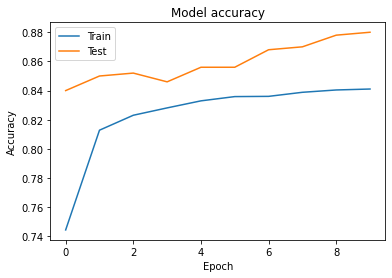

In [0]:
#plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

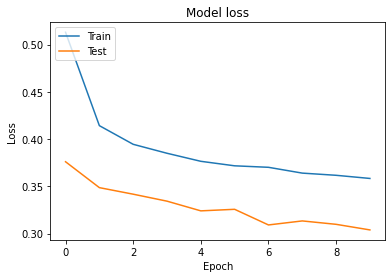

In [0]:
#plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_41 (Conv1D)           (None, 32, 90)            270       
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 32, 90)            24390     
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 32, 90)            32490     
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 32, 90)            40590     
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 90)            0         
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 16, 90)            0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 90)          